In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

In [3]:
from sklearn.datasets import make_classification
X,y = make_classification(n_samples=1000,n_features=2, n_classes=2, n_clusters_per_class=2, n_redundant=0)

In [4]:
pd.DataFrame(X)

,0,1
0,-1.763152,-1.400598
1,-2.278196,-2.304516
2,0.113357,0.973055
3,0.741219,0.400692
4,1.982211,0.696828
...,...,...
995,-0.502701,-0.922624
996,0.449049,0.709593
997,0.843376,-1.808723
998,3.994015,1.599530


In [5]:
pd.DataFrame(X)[0] # to access the first col of the data frame

0     -1.763152
1     -2.278196
2      0.113357
3      0.741219
4      1.982211
         ...   
995   -0.502701
996    0.449049
997    0.843376
998    3.994015
999   -0.578408
Name: 0, Length: 1000, dtype: float64

<Axes: xlabel='0', ylabel='1'>

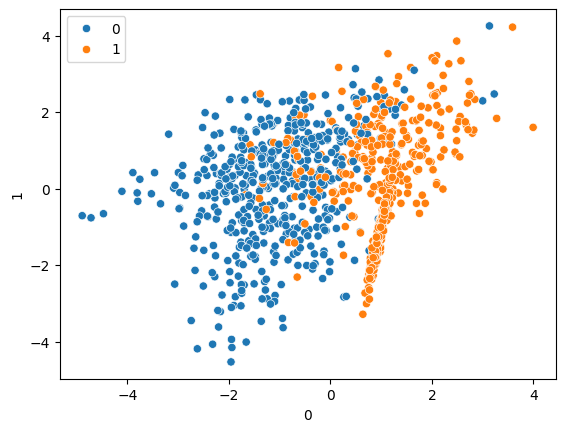

In [6]:
sns.scatterplot(x=pd.DataFrame(X)[0], y=pd.DataFrame(X)[1],hue=y)

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30, random_state=1)

In [12]:
from sklearn.svm import SVC
clf= SVC(kernel = 'linear')
clf

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [13]:
clf.fit(X_train,y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [14]:
clf.coef_

array([[ 1.50375856, -0.08994835]])

In [15]:
y_pred = clf.predict(X_test)

In [17]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89       140
           1       0.90      0.92      0.91       160

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300

[[123  17]
 [ 13 147]]
0.9


In [18]:
# hyperparameter tuning with SVC
from sklearn.model_selection import GridSearchCV

params= {'C':[0.1,0.2,1,2,3,10,50,100],
        'gamma':[1,0.1,0.2,0.001,0.003],
        'kernel' :['linear']}

In [20]:
grid = GridSearchCV(SVC(), param_grid = params, cv=5, verbose=3)
grid

,estimator,SVC()
,param_grid,"{'C': [0.1, 0.2, ...], 'gamma': [1, 0.1, ...], 'kernel': ['linear']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,3
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,1.0


In [21]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.907 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.879 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.914 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.893 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.907 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.907 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.879 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.914 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.893 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.907 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.2, kernel=linear;, score=0.907 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.2, kernel=linear

,estimator,SVC()
,param_grid,"{'C': [0.1, 0.2, ...], 'gamma': [1, 0.1, ...], 'kernel': ['linear']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,3
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,0.2


In [22]:
grid.best_params_

{'C': 0.2, 'gamma': 1, 'kernel': 'linear'}

In [23]:
grid.best_score_

np.float64(0.9014285714285715)

In [26]:
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

In [24]:
y_pred = grid.predict(X_test)

In [25]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88       140
           1       0.89      0.92      0.90       160

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300

[[121  19]
 [ 13 147]]
0.8933333333333333
